In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib

In [2]:
data=pd.read_csv("information.csv",encoding='latin1')

In [3]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

data['Tweets'] = [cleaning(s) for s in data['text']]
data['Description'] = [cleaning(s) for s in data['description']]

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
data['Tweets'] = data['Tweets'].str.lower().str.split()
data['Tweets'] = data['Tweets'].apply(lambda x : [item for item in x if item not in stop])


In [13]:
Male = data[data['gender'] == 'male']
Female = data[data['gender'] == 'female']
Brand = data[data['gender'] == 'brand']
print(" ".join(Male['Tweets'][0]))
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]

robbie e responds critics win eddie edwards worldtitleseries nsybbmvjkz


In [5]:
pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]

'ù',         365
'like',      322
'get',       309
'û',         235
'one',       209
'new',       192
'time',      191
'go',        185
'love',      179
'people',    155
dtype: int64

<AxesSubplot:>

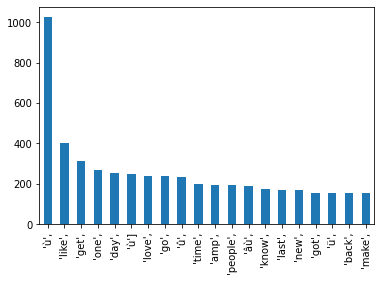

In [6]:
Female_Words.plot(kind='bar',stacked=True)

<AxesSubplot:>

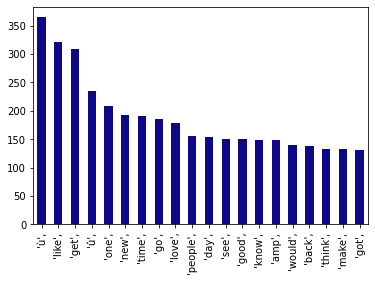

In [7]:
Male_Words.plot(kind='bar',stacked=True, colormap='plasma')

<AxesSubplot:>

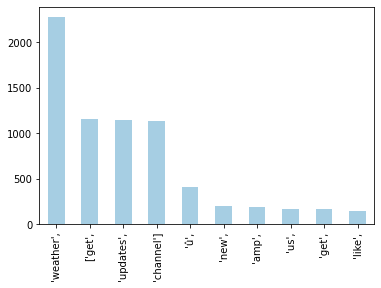

In [8]:
Brand_words.plot(kind='bar',stacked=True, colormap='Paired')